number of steps and H are 25 0.04


Enter total time:  0.045
Enter time step (0 to stop):  0.001


time step and time are: 0.001 0.045
[0.         0.01159111 0.02816666 0.05522918 0.09889833 0.16524344
 0.25870478 0.37983677 0.52308947 0.67570374 0.81873066 0.93053087
 0.99203191 0.99203191 0.93053087 0.81873066 0.67570374 0.52308947
 0.37983677 0.25870478 0.16524344 0.09889833 0.05522918 0.02816666
 0.        ]


<Figure size 432x288 with 0 Axes>

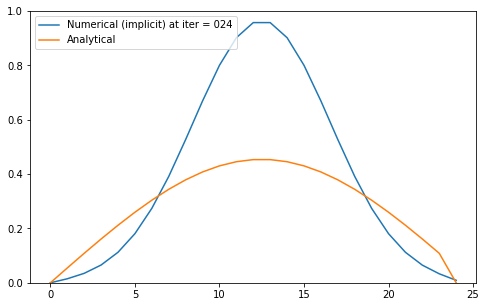

<Figure size 432x288 with 0 Axes>

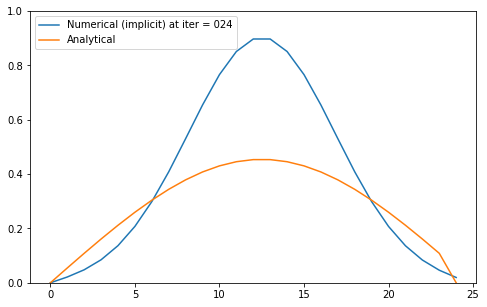

<Figure size 432x288 with 0 Axes>

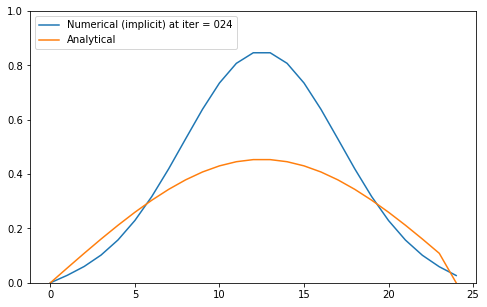

<Figure size 432x288 with 0 Axes>

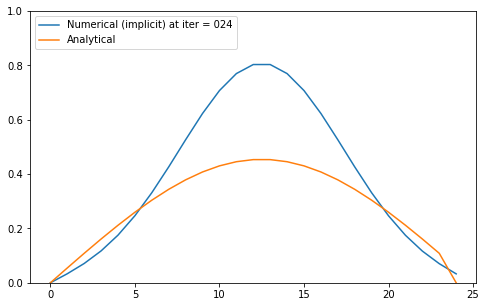

<Figure size 432x288 with 0 Axes>

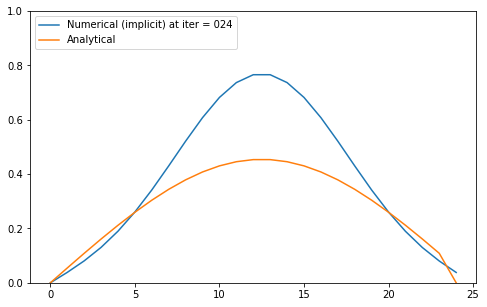

<Figure size 432x288 with 0 Axes>

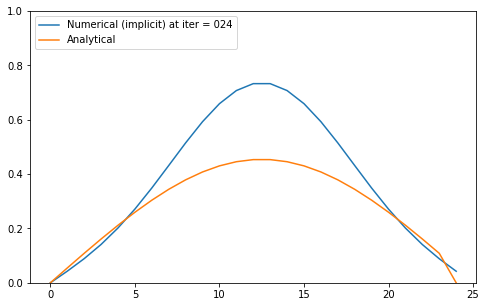

<Figure size 432x288 with 0 Axes>

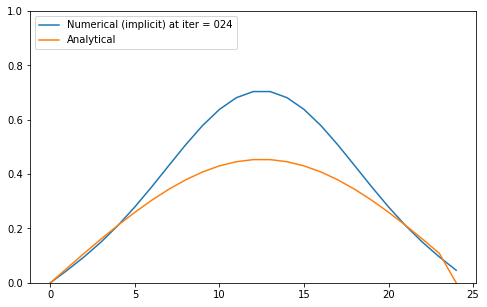

<Figure size 432x288 with 0 Axes>

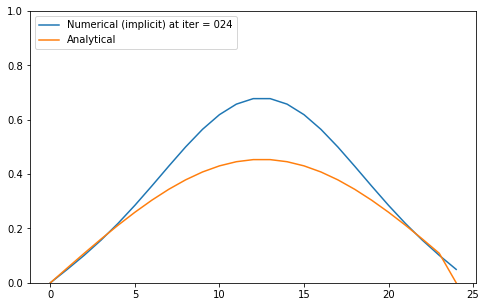

<Figure size 432x288 with 0 Axes>

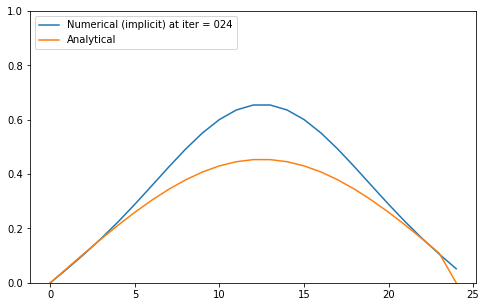

<Figure size 432x288 with 0 Axes>

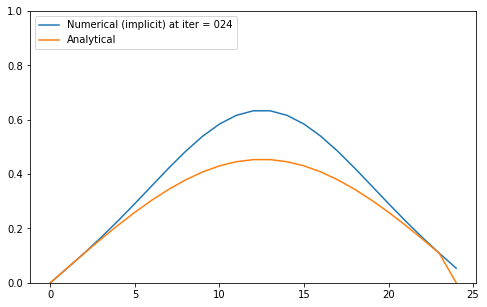

<Figure size 432x288 with 0 Axes>

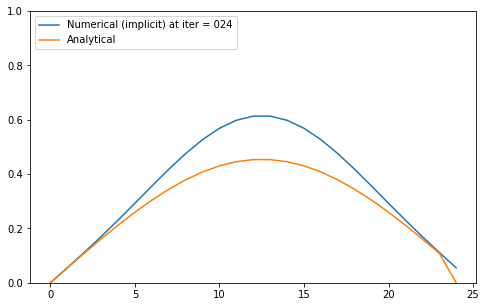

<Figure size 432x288 with 0 Axes>

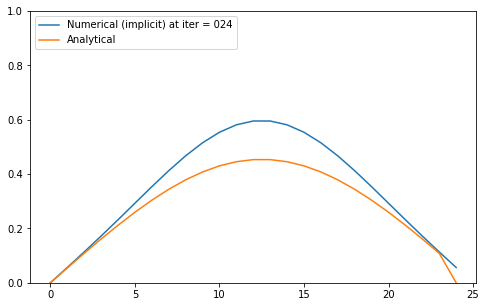

<Figure size 432x288 with 0 Axes>

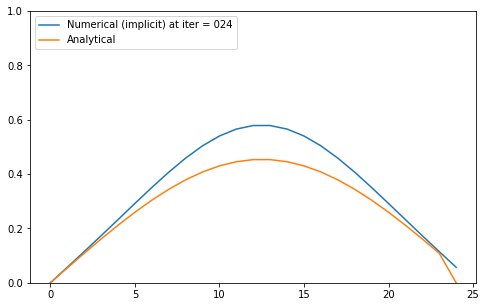

<Figure size 432x288 with 0 Axes>

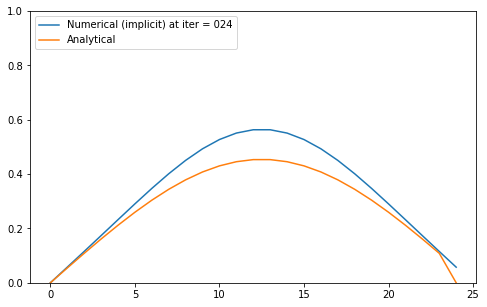

<Figure size 432x288 with 0 Axes>

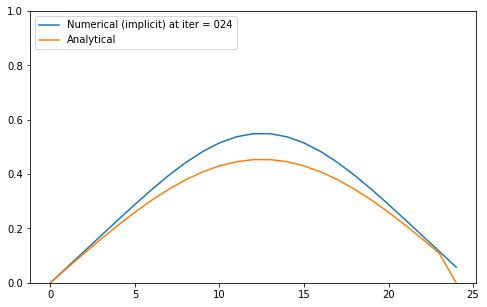

<Figure size 432x288 with 0 Axes>

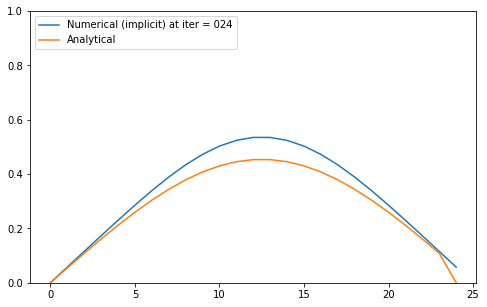

<Figure size 432x288 with 0 Axes>

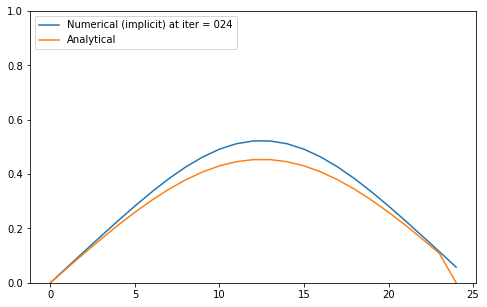

<Figure size 432x288 with 0 Axes>

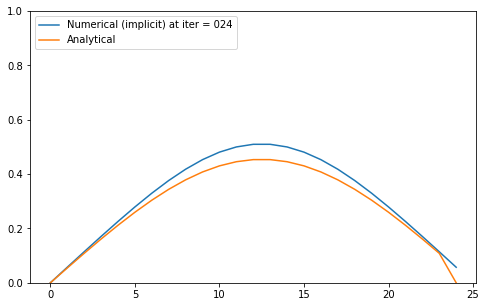

<Figure size 432x288 with 0 Axes>

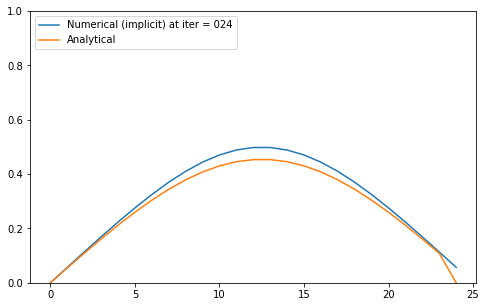

<Figure size 432x288 with 0 Axes>

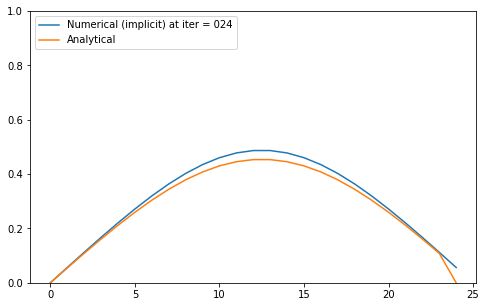

<Figure size 432x288 with 0 Axes>

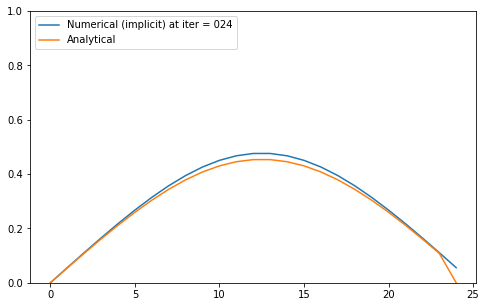

<Figure size 432x288 with 0 Axes>

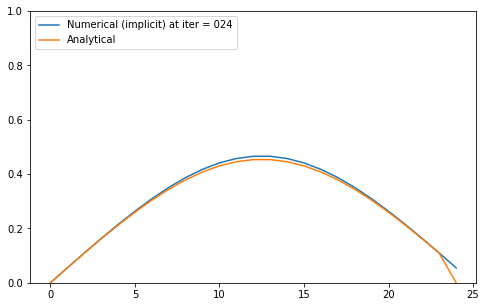

<Figure size 432x288 with 0 Axes>

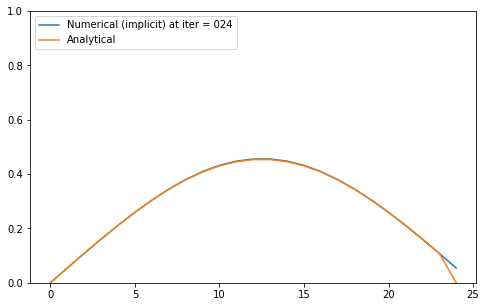

In [4]:

from matplotlib import cm
import matplotlib.pyplot as plt
import cmath, math
import numpy as np

NSTEP = 25                # Total number of domain steps 
H = 1.0/NSTEP             # Spacing
phi = np.zeros(NSTEP)     # Space of PHI
diff = np.zeros(NSTEP)    # Space of Error
alpha = np.zeros(NSTEP)
beta = np.zeros(NSTEP)
gamma = np.zeros(NSTEP)
exactsol = np.zeros(NSTEP)

print("number of steps and H are", NSTEP, H)

### Function Arrangement
def gauss(x,t):
    return math.exp(-20.0 * (x-0.5)**2/(1.0+80*t))/math.sqrt(1.0+80*t)

def exact(x,t):
    return gauss(x,t) - gauss(x-1.0,t) - gauss(x+1.0,t)

### Calculation
time =  input("Enter total time: ")
dt = input("Enter time step (0 to stop): ")
print("time step and time are:", dt, time)

dt = float(dt); time = float(time)

if dt == 0:
    print("dt is zero and program is stopping")
    quit()

NITER=int(time/dt)
dth=dt/H**2
t=0; phi[0]=0 ; phi[NSTEP-1]=0

for i in range(0, NSTEP-1):
    phi[i]=exact(i*H, t)
print(phi)

ap = -dth
az = 1.0 + 2.0*dth
alpha[NSTEP-1]=0
gamma[NSTEP-1]=-1.0/az

for i in range(NSTEP-1, 0, -1):
    alpha[i-1]=gamma[i]*ap
    gamma[i-1]=-1.0/(az+ap*alpha[i-1])
    
for j in range(0,NITER):
    beta[NSTEP-2]=phi[NSTEP-1]
    for i in range(NSTEP-1,0,-1):
        beta[i-1]=gamma[i]*(ap*beta[i]-phi[i])
    phi[0]=0

    for i in range(0,NSTEP-1):
        phi[i+1]=alpha[i]*phi[i]+beta[i]
        exactsol[i] = exact(i*H, time)
    if j % 2 == 0:
        plt.clf()
        fig = plt.figure(figsize=(8,5))
        plot1 = plt.plot(range(0,NSTEP), phi, label="Numerical (implicit) at iter = %03d" % (i+1))
        plot2 = plt.plot(range(0,NSTEP), exactsol, label="Analytical")
        plt.ylim(0,1)
        plt.legend(loc=2)
        plt.show()